# Exploring Why Civil Resistance Works

In this assignment, you will replicate some of the findings of a well-received book, [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) by [Erical Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan. The two authors examined whether nonviolent campaigns are more effective than violent campaigns. They found that yes; from a data set containing details of campaigns from 1900 onwards, they found that in general peaceful campaigns are more effective in achieving their aims than violent ones.

To answer the following questions you will use the data that the authors helpfully provide at <https://www.ericachenoweth.com/wp-content/uploads/2012/01/Data-and-Replication-Files-3.zip>. The data is in Stata format, which pandas can read without a problem. To understand the data, read the documentation at <https://www.ericachenoweth.com/wp-content/uploads/2019/07/WCRW-Appendix.pdf> (in particular, Table WA.7).

---

> Panos Louridas, Associate Professor <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> louridas@aueb.gr

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics as sgr
from matplotlib.collections import LineCollection
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.formula.api import logit


## 1. Frequency of Nonviolent and Violent Campaign End Years

Create a plot showing the frequency of nonviolent and violent campaigns; the frequency should be counted based on their end years, at decades. The violent and nonviolent campaign counts should be stacked on each other.

Your plot should look like the following:

<img src="fig_1.svg"/>

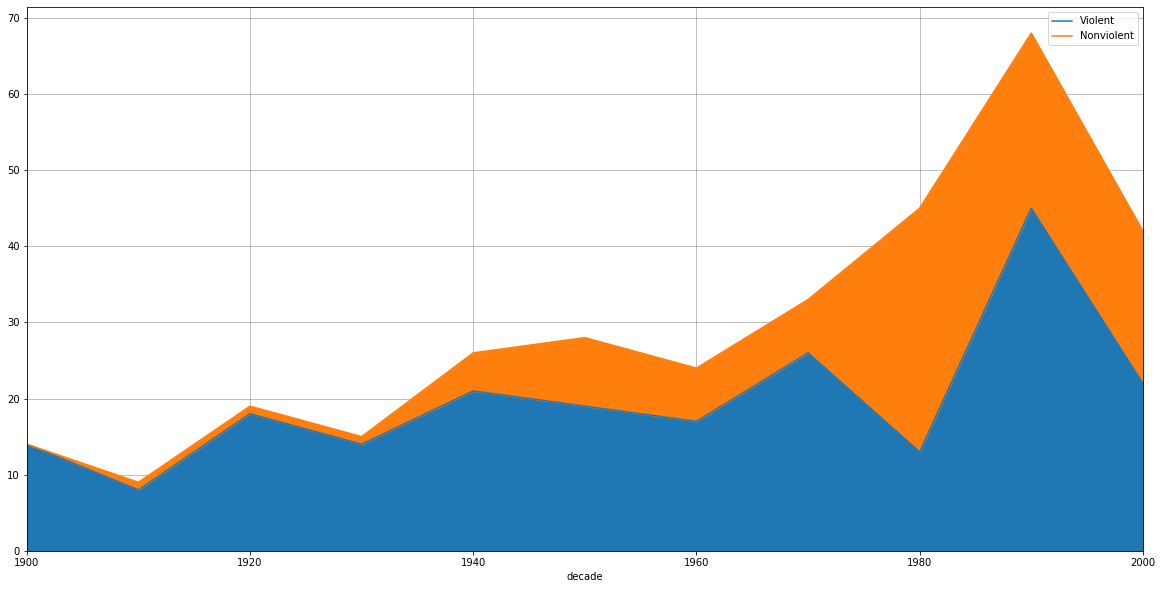

In [82]:
df = pd.read_stata("WCRWreplication.dta")
used = df[['eyear','nonviol']].copy()
used['decade'] = used['eyear']//10*10
#used.drop(columns=['eyear'])
del used['eyear']
used['campaigns'] = 0

fin = used.groupby(['decade','nonviol']).count().unstack(-1)
pl = fin.plot.area(figsize=(20,10))
plt.legend(['Violent','Nonviolent'])
plt.grid(linestyle='-', linewidth='0.5', color='grey')
pl.set_axisbelow(True)

## 2: Number of Nonviolent Campaigns and Percentage of Success

Create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success. Your plot will have two vertical axes, one for each of the metrics, and it should look like this:

<img src="fig_2.svg"/>

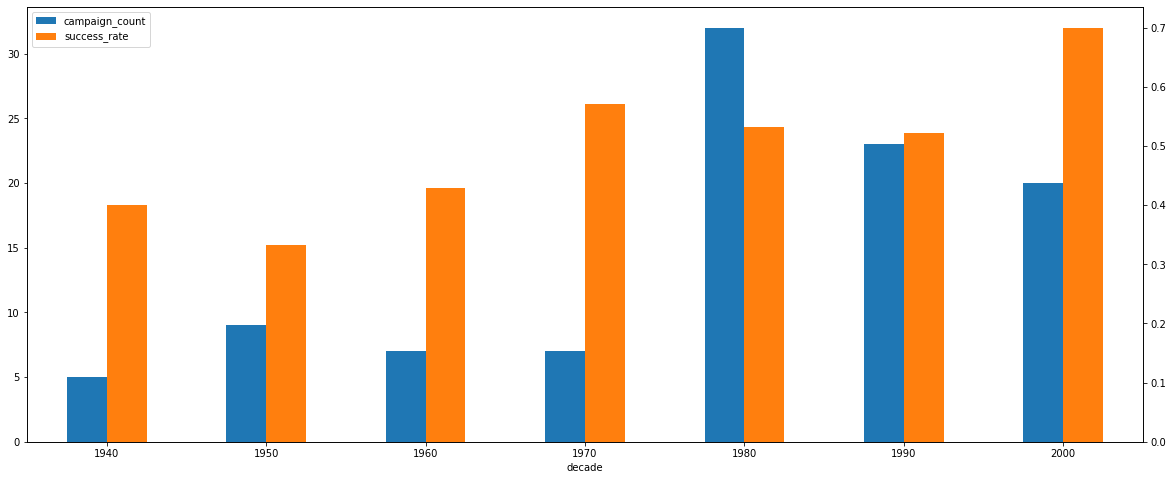

In [129]:
used = df[['eyear','viol','success']].copy()
used['decade'] = used['eyear']//10*10
#used.drop(columns=['eyear'])
del used['eyear']
sel = used[used['viol'] == 0 ]
sel = sel.groupby('decade')['success'].agg({'success_rate': lambda x: x.sum() / x.count(), 'campaign_count': lambda x: x.count()}).reset_index()
sel = sel.loc[(sel['decade'] >= 1940)]
sel = sel.set_index('decade')
sel = sel[['campaign_count','success_rate']]
fin = sel.plot(figsize=(20,8), kind= 'bar' , secondary_y= 'success_rate' , mark_right=False, rot= 0 )
h1, l1 = fin.get_legend_handles_labels()
h2, l2 = fin.right_ax.get_legend_handles_labels()
fin.legend(h1+h2, l1+l2, loc='upper left')
#fin.legend()

## 3: Success Rate by Decade

Create a plot showing the success rate for violent and nonviolent campaigns by decade. Your plot should look like this, showing that nonviolent campaigns have higher success probabilities:

<img src="fig_3.svg" />

In [142]:
t1 = df[['eyear','viol','success']].copy()
t1['decade'] = t1['eyear']//10*10
#used.drop(columns=['eyear'])
del t1['eyear']
t2 = t1.copy()

t1 = t1[t1['viol'] == 0]
t2 = t2[t2['viol'] == 1]
sel1 = t1.groupby('decade')['success'].agg( lambda x: x.sum() / x.count()).reset_index()
sel2 = t2.groupby('decade')['success'].agg(lambda x: x.sum() / x.count()).reset_index()
sel1 = sel1.loc[(sel1['decade'] >= 1940)]
sel1 = sel1.set_index('decade')
sel2 = sel2.loc[(sel2['decade'] >= 1940)]
sel2 = sel2.set_index('decade')

sel1['nonviol_success'] = sel1['success']
sel1 = sel1.drop(['success'], axis=1)
sel2['viol_success'] = sel2['success']
sel2 = sel2.drop(['success'], axis=1)
sel = sel1.join(sel2)
sel

,nonviol_success,viol_success
decade,,
1940,0.400000,0.333333
1950,0.333333,0.368421
1960,0.428571,0.235294
1970,0.571429,0.384615
1980,0.531250,0.384615
1990,0.521739,0.266667
2000,0.700000,0.136364


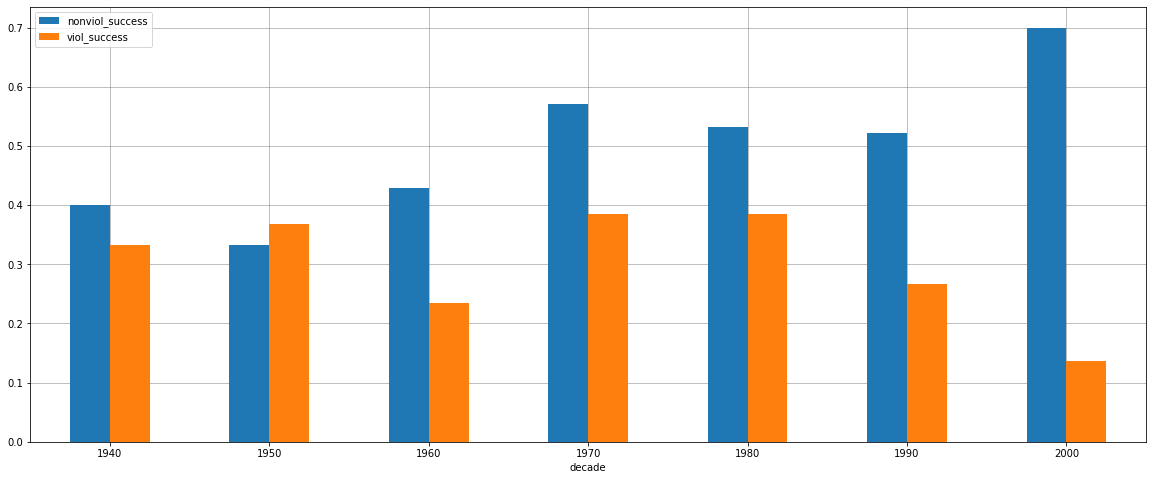

In [146]:
fin = sel.plot(figsize=(20,8), kind= 'bar' , rot= 0 )
fin.legend( loc='upper left')
plt.grid(linestyle='-', linewidth='0.5', color='grey')
fin.set_axisbelow(True)


## 4. Twenty-Five Largest Resistance Campaigns, 1900-2006

Create a table with the twenty-five largest resistance campaigns, for all years, based on their number of members at highest point (peak membership). The table should include the membership, the start year, the end year, the location, the target, whether it was violent or not, and whether it was successful or not. Notice if you find anything about Greece.

In [154]:
df = pd.read_stata("WCRWreplication.dta")

used = df[['peakmembership','byear', 'eyear','location','target','viol','success']].copy()
pd.to_numeric(used['peakmembership'])
used = used.sort_values(by=['peakmembership'], ascending = False).reset_index()

used = used.loc[0:24,:]
used

,index,peakmembership,byear,eyear,location,target,viol,success
0,257,4500000.0,1937,1945,China,Japanese occupation,1,0
1,206,2000000.0,1977,1979,Iran,Shah Reza Pahlavi,0,1
2,311,2000000.0,1986,1983,Philippines,Ferdinand Marcos,0,1
3,289,1000000.0,1988,1988,Burma,military junta,0,0
4,265,1000000.0,1989,1989,China,Communist regime,0,0
5,262,1000000.0,1967,1968,China,anti-Maoists,1,0
6,255,1000000.0,1922,1949,China,Kuomintang regime,1,1
7,10,1000000.0,2006,2006,Mexico,Calderon regime,0,0
8,228,1000000.0,2005,2005,Lebanon,Syrian forces,0,1
9,141,1000000.0,1993,1999,Nigeria,Military rule,0,1


## 5. The Effect of Participation on the Probability of Campaign Success

Examine the effect of participation on the probability of campaign success. You should run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. Explain your results.

Having done that, create a scatter plot showing the logged participants per capita, on the $x$ axis, and the probability of success, on the $y$ axis. Your plot should look like this:

<img src="fig_4.svg" />

In [188]:
df = pd.read_stata("WCRWreplication.dta")
#used =  regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. Explain your results.

df.columns.values
used = df[['success','mempc','lnpop']].copy()
used = used.dropna()

mod = logit("success ~ mempc + lnpop ", used).fit()

mod.summary2()

Optimization terminated successfully.
         Current function value: 0.594790
         Iterations 5


One unit increase in membership per capita brings an increase of 4.4892 in the log odds of having an affair; equivalently, the odds ratio increases by  𝑒^4.4892≈89.050 or about 890%.

One unit increase in membership per capita brings an increase of 0.0907 in the log odds of having an affair; equivalently, the odds ratio increases by  𝑒0.0907≈1.094  or about 109%.

In [184]:
x_test = used['success']
used['mempc'] = pd.to_numeric(used['mempc'])

plot = used.plot.scatter(x='mempc', y=mod.predict('x_test'))

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: TypeError: string indices must be integers
    success ~ mempc + lnpop
              ^^^^^

## 6. The Level of Participation Tipping Point

From the results you obtained in the previous question, find the percentage of the population that is the tipping point for success in a campaign.

## 7. Nonviolent Resistance, Target Regime Type, Geographical Location

1. Examine whether nonviolent resistance remains significant even if we control for the regime type. Run a logistic   regression of success on the nonviolence indicator controlling for the POLITY IV score of campaign target (`tpolity`), the log of peakmembership, and the location’s logged population the year the campaign ends.

2. Examine whether nonviolent resistance remains significant even if we control for geographical location of the compaign.

## Honor Code

You understand that this is an individual assignment, and as such you must carry it out alone. You may seek help on the Internet, by Googling or searching in StackOverflow for general questions pertaining to the use of Python and pandas libraries and idioms. However, it is not right to ask direct questions that relate to the assignment and where people will actually solve your problem by answering them. You may discuss with your fellow students in order to better understand the questions, if they are not clear enough, but you should not ask them to share their answers with you, or to help you by giving specific advice.